# Data Visualization: Ford GoBike System Data
## by Seishu Miki

## Preliminary Wrangling


The data is Bay Wheels's trip data for public use which I downloaded from https://www.lyft.com/bikes/bay-wheels/system-data.
In this project, I use the trip data in 2018.

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

### Gathering Data###

First of all, I will gather gather data and save the data set as csv file.

In [10]:
folder = 'data_set'
frame = [pd.read_csv(f) for f in glob.glob(os.path.join(folder, '*.csv'))]
result = pd.concat(frame, ignore_index=True)
result.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes


In [13]:
result.shape

(1863721, 14)

In [14]:
result.to_csv('fordgobike_2018.csv', index=False)

In [16]:
biketrip18 = pd.read_csv('fordgobike_2018.csv')
biketrip18.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes


### Assessing Data ###

Second, I will assess the data set named biketrip18.

In [17]:
biketrip18.shape

(1863721, 14)

In [18]:
biketrip18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [19]:
biketrip18.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [20]:
biketrip18.duplicated().sum()

0

In [21]:
biketrip18.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

In [22]:
biketrip18.bike_share_for_all_trip.value_counts()

No     1701386
Yes     162335
Name: bike_share_for_all_trip, dtype: int64

### Cleaning Data ###

I will clean the data set fot the analysis

In [29]:
# Change data types　

biketrip18_clean = biketrip18.copy()
biketrip18_clean['start_time'] = pd.to_datetime(biketrip18_clean['start_time'])
biketrip18_clean['end_time'] = pd.to_datetime(biketrip18_clean['end_time'])

biketrip18_clean['start_station_id'] = biketrip18_clean['start_station_id'].astype('str')
biketrip18_clean['end_station_id'] = biketrip18_clean['end_station_id'].astype('str')
biketrip18_clean['bike_id'] = biketrip18_clean['bike_id'].astype('str')

biketrip18_clean['user_type'] = biketrip18_clean['user_type'].astype('category')

biketrip18_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null datetime64[ns]
end_time                   1863721 non-null datetime64[ns]
start_station_id           1863721 non-null object
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1863721 non-null object
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null object
user_type                  1863721 non-null category
bike_share_for_all_trip    1863721 non-null object
dtypes: category(1), datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 186.6+ MB


### What is the structure of your dataset?

The dataset has 1863721 rows and 14 columns. 

### What is/are the main feature(s) of interest in your dataset?

The features I am interested in are the duration of bike trip and patterns of bike rental. In addtion to them, it is interesting that the relationship between the user type (Subscriber or Customer) and the patterns of bike rental.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

In order to investigate them, the data below can be used: 

- duration_sec
- start_time
- end_time 
- user_type 

To comlete the investigation, I will devide the start_time into start date, hour, day and month and also do the same to end_time.

In [30]:
#Add columns for start date, hour, day and month.
biketrip18_clean['start_date'] = biketrip18_clean.start_time.dt.strftime('%Y-%m-%d')
biketrip18_clean['start_hour'] = biketrip18_clean.start_time.dt.strftime('%H')
biketrip18_clean['start_day'] = biketrip18_clean.start_time.dt.strftime('%A')
biketrip18_clean['start_month'] = biketrip18_clean.start_time.dt.strftime('%B')

#Add columns for end date, hour, day and month.
biketrip18_clean['end_date'] = biketrip18_clean.end_time.dt.strftime('%Y-%m-%d')
biketrip18_clean['end_hour'] = biketrip18_clean.end_time.dt.strftime('%H')
biketrip18_clean['end_day'] = biketrip18_clean.end_time.dt.strftime('%A')
biketrip18_clean['end_month'] = biketrip18_clean.end_time.dt.strftime('%B')

biketrip18_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,start_date,start_hour,start_day,start_month,end_date,end_hour,end_day,end_month
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,...,Subscriber,No,2018-02-28,23,Wednesday,February,2018-03-01,00,Thursday,March
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,...,Customer,No,2018-02-28,23,Wednesday,February,2018-02-28,23,Wednesday,February


In [31]:
#Save the modified data set to csv file.
biketrip18_clean.to_csv('biketrip_clean_2018.csv', index=False)

In [183]:
biketrip18_analysis = pd.read_csv('biketrip_clean_2018.csv')
biketrip18_analysis.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,start_date,start_hour,start_day,start_month,end_date,end_hour,end_day,end_month
0,598,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,...,Subscriber,No,2018-02-28,23,Wednesday,February,2018-03-01,0,Thursday,March
1,943,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,...,Customer,No,2018-02-28,23,Wednesday,February,2018-02-28,23,Wednesday,February
2,18587,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,No,2018-02-28,18,Wednesday,February,2018-02-28,23,Wednesday,February
3,18558,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,No,2018-02-28,18,Wednesday,February,2018-02-28,23,Wednesday,February
4,885,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,...,Subscriber,Yes,2018-02-28,23,Wednesday,February,2018-02-28,23,Wednesday,February


For the analysis I will do bellow,  I use the csv file named "biketrip_clean_2018.csv"

## Univariate Exploration

In this section,I am investigating distributions of individual variables such as start hours, day, monnth, duration in minuets, number of customers and subscribers and number of users who shared the bike for all trip.

Text(0, 0.5, 'Count')

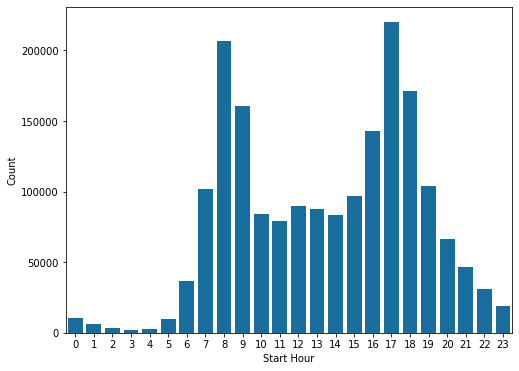

In [161]:
# Distribution of hours

color1 = sb.color_palette('colorblind')[0]

sb.countplot(data=biketrip18_analysis, x='start_hour', color = color1)
plt.xlabel('Start Hour')
plt.ylabel('Count')

It can be seen that there are two peak hours, 8am and 17pm. Few users start to use bike between 0am to 5am. The number starts to increase from 6am and it reaches to the highest number in the morning at 8am. Then, the number dropped by half in the next two hours. The number jumps to the highest during a day at 17pm, and it gradyally decreases until midnight. 

Text(0, 0.5, 'Count')

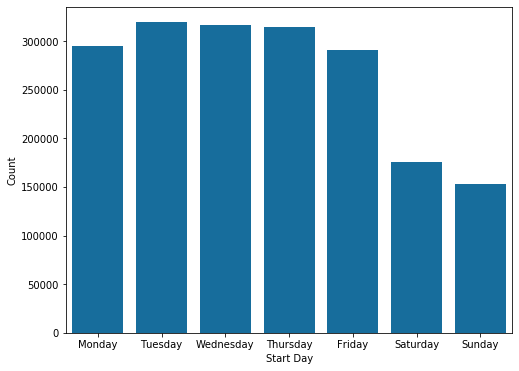

In [162]:
# Distribution of days

day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daycat = pd.api.types.CategoricalDtype(ordered=True, categories=day)
biketrip18_analysis['start_day'] = biketrip18_analysis['start_day'].astype(daycat)

sb.countplot(data=biketrip18_analysis, x='start_day', color=color1)
plt.xlabel('Start Day')
plt.ylabel('Count')

The distributions during weekdays and weekends are signifficanty different. The numbers are about 300000 on weekdays, and it became about half on weekends.

Text(0, 0.5, 'Count')

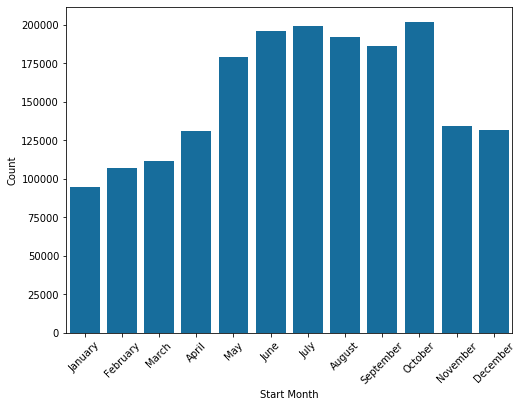

In [163]:
# Distribution of month

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
biketrip18_analysis['start_month'] = biketrip18_analysis['start_month'].astype(monthcat)

sb.countplot(data=biketrip18_analysis, x='start_month', color=color1)
plt.xticks(rotation=45)
plt.xlabel('Start Month')
plt.ylabel('Count')


The number from May to October is higher than 175000, and it can be seen that the most users utilize this service. Winter and early spring are not popular seasons for bike users. Judging from the changes of numbers.

Text(0.5, 0, 'Duration in Second')

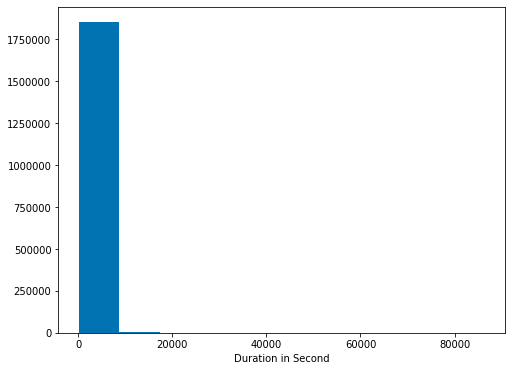

In [164]:
plt.hist(data=biketrip18_analysis, x='duration_sec', color=color1)
plt.xlabel('Duration in Second')

As the duration time is shown in second, it is a little difficult to imagine the situation of trip duration. I will devided the number by 60 and show it in minuets.

In [165]:
biketrip18_analysis['duration_min'] = biketrip18_analysis['duration_sec']/60

Text(0.5, 0, 'Duration in Minute')

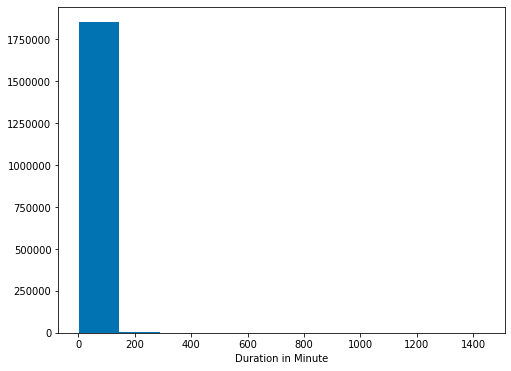

In [166]:
plt.hist(data=biketrip18_analysis, x='duration_min', color=color1)
plt.xlabel('Duration in Minute')

The graph shows that the trip minutes are less than 200 in many cases. I will analyze the duration more below.

In [167]:
biketrip18_analysis['duration_min'].describe()

count    1.863721e+06
mean     1.428838e+01
std      3.950631e+01
min      1.016667e+00
25%      5.833333e+00
50%      9.266667e+00
75%      1.453333e+01
max      1.439433e+03
Name: duration_min, dtype: float64

In [168]:
print(biketrip18_analysis['duration_min'].mean())
print(biketrip18_analysis['duration_min'].max())

14.288376183989914
1439.4333333333334


In [169]:
np.percentile(biketrip18_analysis['duration_min'], 98)

52.666666666666664

Trip duration of 98% of users are less than 53 minutes.

Text(0.5, 0, 'Trip Duration in Minute')

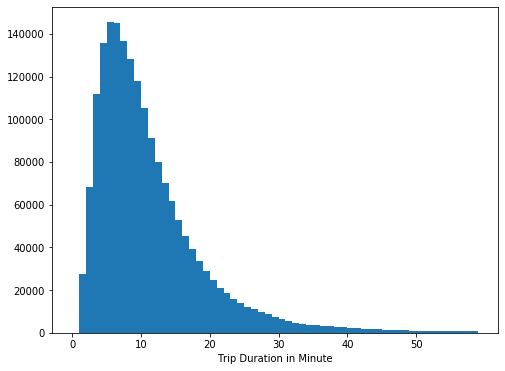

In [170]:
plt.hist(data=biketrip18_analysis, x='duration_min', bins=np.arange(0, 60, 1))
plt.xticks(np.arange(0, 60, 10))
plt.xlabel('Trip Duration in Minute')

The histry graph shows that trip duration of most cases is within 50 minutes. In addition, it can be seen that most rides last for only 0 to 20 minutes.

Text(0, 0.5, 'Count')

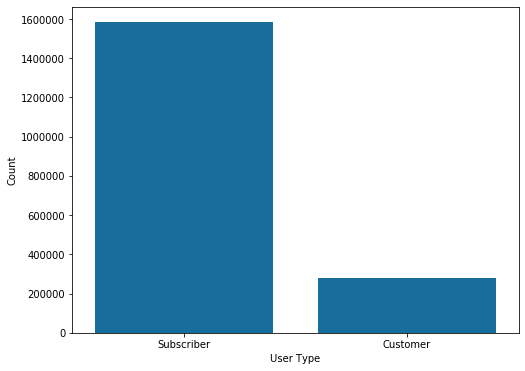

In [171]:
sb.countplot(data=biketrip18_analysis, x='user_type', color=color1)
plt.xlabel('User Type')
plt.ylabel('Count')

As the graph shows, tthere is a significant gap between numbers of subscribers and customers.

(-1.1042254605980044,
 1.1065949495987788,
 -1.1061026208216826,
 1.1047177893751006)

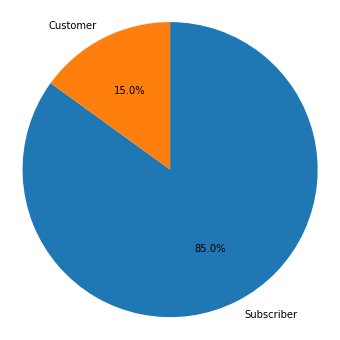

In [172]:
percentage_user_type = biketrip18_analysis.user_type.value_counts()/biketrip18_analysis.shape[0]
plt.pie(percentage_user_type, labels=percentage_user_type.index, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('square')

85% of total uses are by Subscribers.

Text(0, 0.5, 'Count')

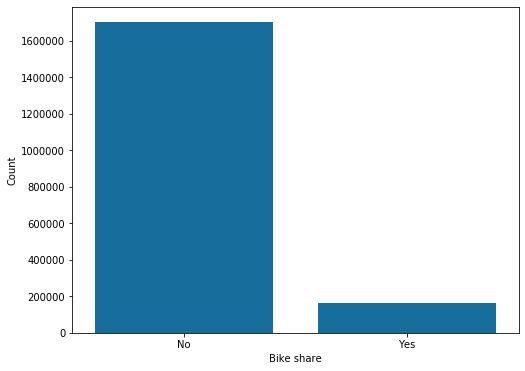

In [173]:
sb.countplot(data=biketrip18_analysis, x='bike_share_for_all_trip', color=color1)
plt.xlabel('Bike share')
plt.ylabel('Count')

(-1.1054673297110469,
 1.1075905317028791,
 -1.1068846168567925,
 1.1061732445571335)

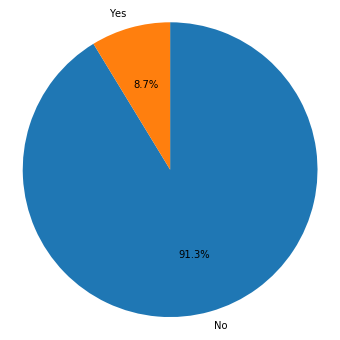

In [174]:
percentage_user_type = biketrip18_analysis.bike_share_for_all_trip.value_counts()/biketrip18_analysis.shape[0]
plt.pie(percentage_user_type, labels=percentage_user_type.index, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('square')

Over 90% of users do not share bike during their trip.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I did not need any transformations to analyze the distributions of the variables I picked here.

By analyzing start hour, day and month, it can be seen that there are popular period in each unit. 8am and 17pm are the peak hours when more users start bike rides. In addition, weekdays are more popular than weekends. Compared with winter and early spring, summber is more popular season to ride a bike. 

When looking into the trip duration im minutes, most users ride bikes for short time. 98 percent of trip durations is within 53 minutes, and also most of duration last between 0 to 20 minutes.  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In this section, I devided start_time into smaller unites, hour, day and month by additing new columns. Also, I added columns of end hour, day and month but I did not use them for the analysis in this section.

## Bivariate Exploration

In this section, I will analyze relationships between pairs of variables. The main focus will be on the trip duration. I will investigate how trip duration changes based on different variables. 
Firstly, I will look into trip duration of different users.

Text(0.5, 0, 'Minuets')

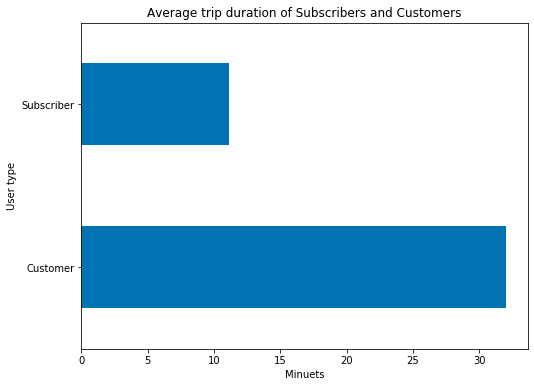

In [175]:
# Difference of duration between user type
ave_min_user = biketrip18_analysis.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=color1)
ave_min_user.set_title('Average trip duration of Subscribers and Customers')
ave_min_user.set_ylabel('User type')
ave_min_user.set_xlabel('Minuets')

The average trip duration of subscriber is about 10 minutes, while it is over 30 minutes for customers. 

Text(0.5, 0, 'Minuets')

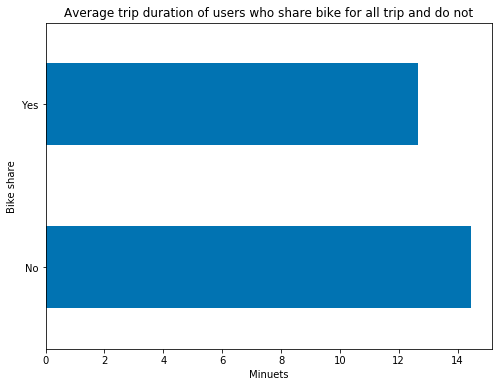

In [176]:
# Difference of duration between user who shared bike
ave_min_share = biketrip18_analysis.groupby('bike_share_for_all_trip')['duration_min'].mean().plot(kind='barh', color=color1)
ave_min_share.set_title('Average trip duration of users who share bike for all trip and do not')
ave_min_share.set_ylabel('Bike share')
ave_min_share.set_xlabel('Minuets')

The graph does not show a outstanding difference between users who experienced bike share or did not on their trip.

I will see if there is a different patterns of trip duration based on day and month. 

Text(0, 0.5, 'Duration in Minute')

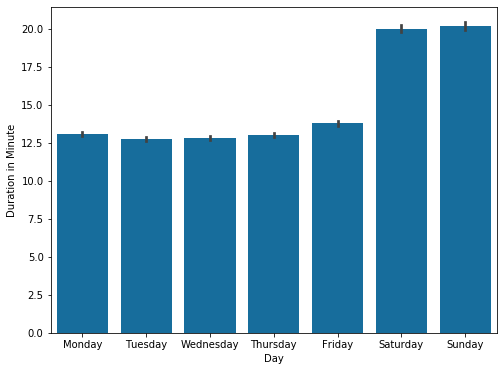

In [177]:
# Duration based on day
sb.barplot(data=biketrip18_analysis, x='start_day', y='duration_min', color=color1)
plt.xlabel('Day')
plt.ylabel('Duration in Minute')

As shown in the graph, trip duraton minuets on weekends are longer than the ones on weekdays, while less users ride bikes on weekends. 

Text(0, 0.5, 'Duration in Minute')

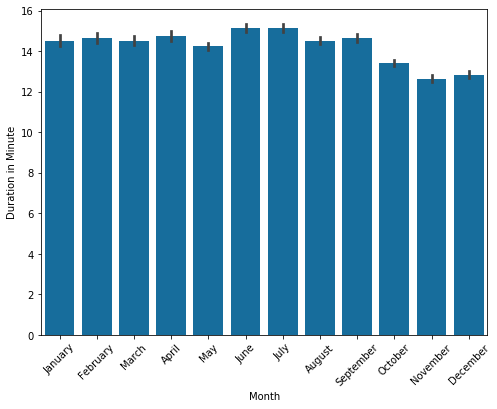

In [178]:
#Duration based on month
sb.barplot(data=biketrip18_analysis, x='start_month', y='duration_min', color=color1)

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Duration in Minute')

On the other hand, when looking into trip duration by month, there is no significant differences.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Trip durtion minutes changes their patterns based on some variables. If you look at the difference of trip duration between users who shared bike on their trip and who didn't, you cannot see a clear difference. On the other hand, trip duration varies clearly with user type. The average of trip duration of customers is about 20 minutes longer than the one of subscribers. In this sense, we can predict that subscribers use bikes for shorter trips. 

Next, trip duration changes on weekdays and weekends but in per month. Trip duration lasts longer by about 7 minutes on weekends than the one on weekdys. In contrast, there is no significant change between month.

## Multivariate Exploration

In this section, I will create plots of three variables to for further investigation. As the previous section described, there was a gap between trip duration minutes of subscribers and ones of customers. In addition, it was observed that trip duration changes on weekdays and weekends. I will look into the patterns of subscribers' trip duration and customers' by comparing with them.

Text(0, 0.5, 'Duration in Minute')

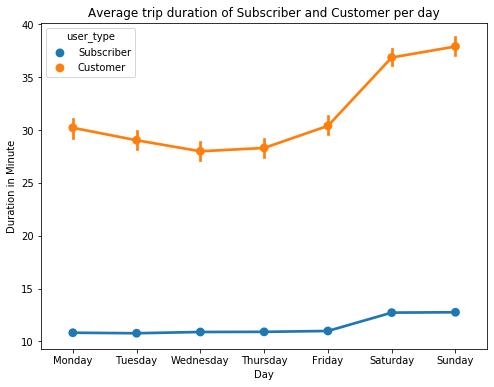

In [93]:
sb.pointplot(data=biketrip18_analysis, x='start_day', y='duration_min', hue='user_type', linestyles="solid")
plt.title('Average trip duration of Subscriber and Customer per day')
plt.xlabel('Day')
plt.ylabel('Duration in Minute')

Both of subscribers' and customers' trip duration increases on weekends.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Subscribers' duration minuyes are much shorter than customers' on each day a week. On the other hand, there is a common point for both user types. Trip duration of both user types increases on weekends.　Customers' trip duration varies slightly while subscribers show stable trip duration through weekdays.

### Were there any interesting or surprising interactions between features?

It is interesting that customers' and subscribers' trip duration has the similar pattern of changes through a week even though their average duration minuets are significantly different.